# Lung Cancer Decision Trees Project

## Table of Contents 
1. Introduction
2. Preparing the Data
3. Cleaning the Data
4. Exploratory Data
5. Analyzing the Data
6. Results
7. Conclusion

## Introduction

Have you ever wondered how effective we can predict lung cancer given a variety of symptoms with machine learning?

This project analyzes data from a data set from a prediction website that predicts lung cancer from given patients. 

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve our question: 

How effective can we predict lung cancer?

## Preparing the Data
 
There are numerous packages that are needed for this project imported down below.

In [1]:
# We will be using the module DecisionTreeClassifier from sklearn.neighbors and KNeighborsClassifier from sklearn.neighbors
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Converting our csv file into a panda dataframe
df = pd.read_csv("lung_cancer.csv")

In [3]:
# We check our dataframe
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Cleaning the Data
 
We clean the data to make our final analysis more precise and accurate.

In [4]:
# We modify our colums to lowercase and condense the strings
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue_', 'allergy_', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

In [5]:
# We do not want 1 and 2 values but rather 0 and 1 binary values for our model by using LabelEncoder
for column in df:
    if column == 'age':
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue_,allergy_,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [6]:
# We fix the error for the two columns
new_df = df.rename({'fatigue_': 'fatigue', 'allergy_': 'allergy'}, axis=1)

In [7]:
# Lets check the new dataframe again
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 309 non-null    int32
 1   age                    309 non-null    int64
 2   smoking                309 non-null    int64
 3   yellow_fingers         309 non-null    int64
 4   anxiety                309 non-null    int64
 5   peer_pressure          309 non-null    int64
 6   chronic_disease        309 non-null    int64
 7   fatigue                309 non-null    int64
 8   allergy                309 non-null    int64
 9   wheezing               309 non-null    int64
 10  alcohol_consuming      309 non-null    int64
 11  coughing               309 non-null    int64
 12  shortness_of_breath    309 non-null    int64
 13  swallowing_difficulty  309 non-null    int64
 14  chest_pain             309 non-null    int64
 15  lung_cancer            309 non-null    i

In [8]:
# Cleaning our data requires checking null values
new_df.isnull().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

In [9]:
# Besides null values, we want to make sure there are no duplicates
new_df.duplicated().sum()

33

In [10]:
# I made the decision to drop the duplicated values
new_df.drop_duplicates(inplace=True)

In [11]:
new_df.duplicated().sum()

0

In [12]:
# We now have 276 non null values for each column
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 276 non-null    int32
 1   age                    276 non-null    int64
 2   smoking                276 non-null    int64
 3   yellow_fingers         276 non-null    int64
 4   anxiety                276 non-null    int64
 5   peer_pressure          276 non-null    int64
 6   chronic_disease        276 non-null    int64
 7   fatigue                276 non-null    int64
 8   allergy                276 non-null    int64
 9   wheezing               276 non-null    int64
 10  alcohol_consuming      276 non-null    int64
 11  coughing               276 non-null    int64
 12  shortness_of_breath    276 non-null    int64
 13  swallowing_difficulty  276 non-null    int64
 14  chest_pain             276 non-null    int64
 15  lung_cancer            276 non-null    i

## Exploratory Data

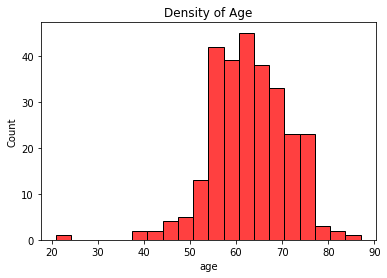

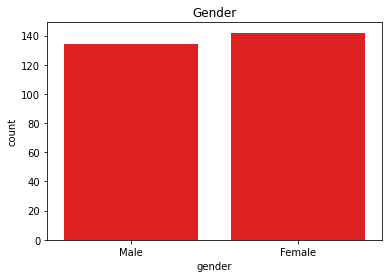

In [13]:
# Displaying our age and gender disparity 
sns.histplot(data = new_df, x = 'age', color = 'red')
plt.title('Density of Age')
plt.show()

g = sns.countplot(data = new_df, x = 'gender', color = 'red')
plt.title('Gender')
g.set_xticklabels(['Male', 'Female'])
plt.show()

We can observe that the density of the age is left skewed (negatively skewed) and we can infer that most of the ages are distributed from mid 50's to mid 60's. We can realistically also infer that older people are more prone to respiratory diseases comapred to younger individuals.

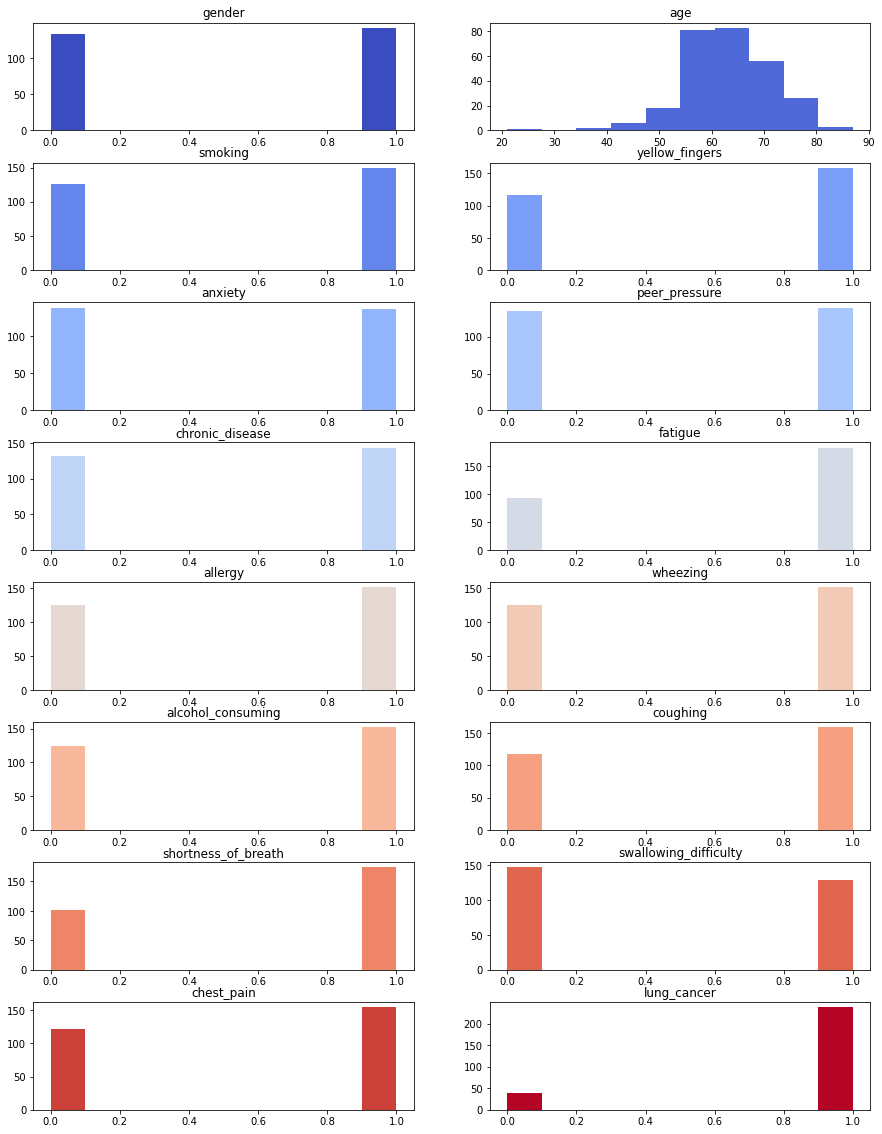

In [14]:
# Plotting the disparity of all of the variables to showcase the severity of these lung cancer symptoms
fig, axs = plt.subplots(8,2, figsize=(15, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
axs = axs.ravel()

colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, 16))

for i in range(16):
    axs[i].hist(new_df.iloc[:, i], bins = 10, color = colors[i])
    axs[i].set_title(new_df.columns[i])

plt.show()

We can infer from these subgraphs that the symptoms that most patients were diagnosed was fatigue, coughing, shortness of breath, coughing, and yellow fingers. This is realistic as we associate lung cancer with these symptoms.

## Analyzing the Data 

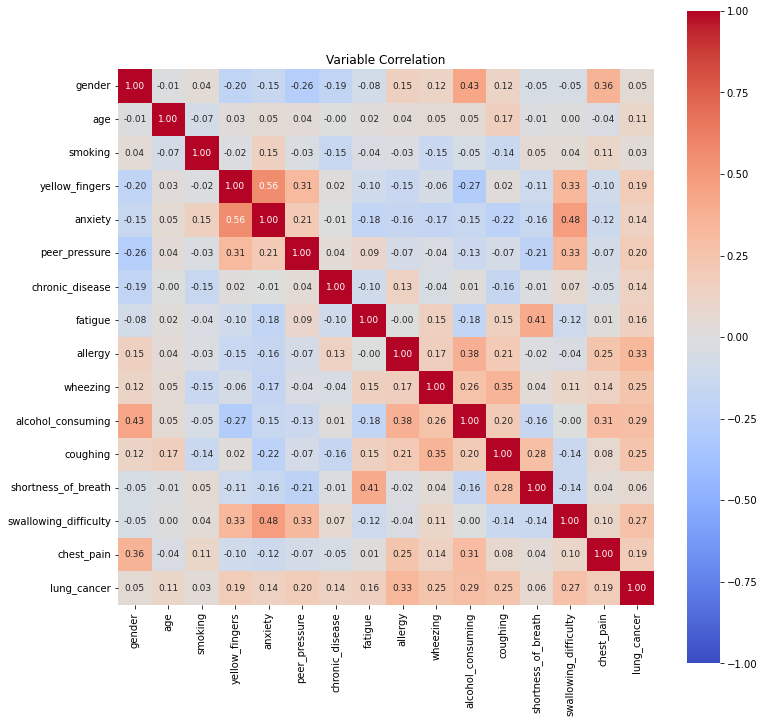

<Figure size 432x288 with 0 Axes>

In [15]:
# Creating a heatmap to showcase the correlations between variables
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, cmap = 'coolwarm', square=True, annot= True, fmt='0.2f', annot_kws={"size": 9}, vmin=-1, vmax=1)
plt.title('Variable Correlation')
plt.show()
plt.clf()

After observing the correlations of the variables, we can observe that:

Variables with a moderate correlation with lung cancer:                  
Allergy, alcohol consumption, swallowing difficulty, and coughing

Variables with a weak correlation with lung cancer:                     
gender, age, smoking, shortness of breath

The variables with a weak correlation can be confusing to understand as we often associate ourselves with smoking and shortness of breath as a real indicator of lung cancer. We will observe these relationships more deeply with our machine learning model that consists of a decision tree module.

In [16]:
# Creating our indepedent and dependent variables 
x = new_df.iloc[:, 0:14]
y = new_df.iloc[:, -1]

In [17]:
# Using train_test_split to set up our model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [18]:
# Creating and modifying our model to fit our training set
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
# Testing our model
model.score(x_test, y_test)

0.9156626506024096

In [20]:
# Predicting our final values
y_pred = model.predict(x_test)

In [21]:
# Using classification report as a means to analyze our model scores
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.94      0.96      0.95        71

    accuracy                           0.92        83
   macro avg       0.84      0.81      0.82        83
weighted avg       0.91      0.92      0.91        83



The precision, recall, f1-score are all measurements of a model's accuracy. The precision is the proportion of the true positive results which indicates how accurate the model was in predicting true positive results. The precision score from our model is a 0.94 which is a strong score in predicting lung cancer.

The recall score is the proportion of true positive results among all actual positive results (true positive and false negative results). The recall score of this model was 0.96 which is also a good measurement of a true positive rate as it means our model had a low rate of false negatives.

The f1-score is the harmonic mean of precision and recall. It is a measure of a model's accuracy that balances precision and recall. The f1-score is 0.95 which a good score which means our model was an overall effective model for our data.

In [22]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

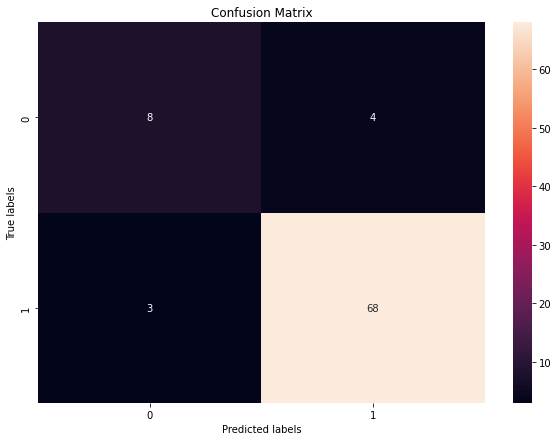

In [23]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## Conclusion

In this project, the model's precision, recall, and f1-score for predicting lung cancer were 0.94, 0.96, and 0.95 respectively. These values indicate that the model performed well in correctly identifying positive instances of lung cancer while minimizing the number of false positives and false negatives.

The analysis of the correlation between various variables and lung cancer revealed that symptoms such as fatigue, coughing, shortness of breath, and yellow fingers had a moderate correlation with lung cancer. On the other hand, variables such as gender, age, smoking, and shortness of breath had a weak correlation with lung cancer. Overall, the model score was 0.916, indicating that the model was able to accurately predict lung cancer. This is a strong indication that the project was successful in achieving its goal of creating an effective model for predicting lung cancer.